In [28]:
import numpy as np
import pandas as pd
import rasterio
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv3D
import matplotlib.pyplot as plt

In [42]:
# Function to plot a raster image with a title
def show_band(data, title='', size=(10, 10), cmap='viridis'):
    plt.figure(figsize=size)
    plt.imshow(data, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.axis('off')
    plt.show()

def load_static_raster(file_path, title):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        masked_data = np.ma.masked_equal(data, src.nodata)  # Mask nodata values
    show_band(masked_data, title=title)  # Show the raster with color map
    return masked_data

In [43]:
elevation_path = 'calraster/elevation.tif'
# soil_path = 'path_to_soil_map.tif'

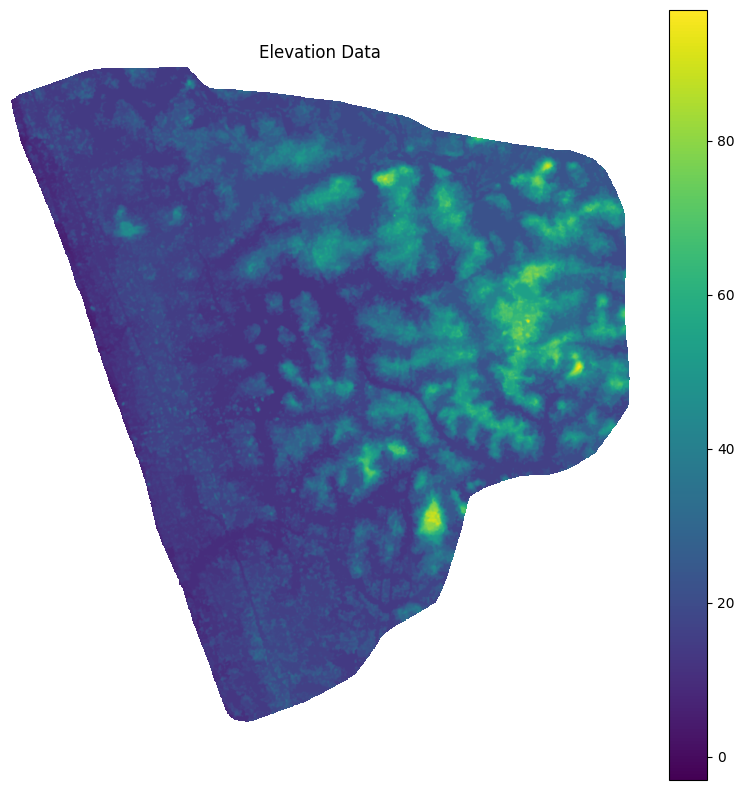

In [44]:
elevation_data = load_static_raster(elevation_path, "Elevation Data")

In [61]:
precipitation_data = pd.read_csv('calraster/precipitation_data.csv')

In [63]:
precipitation_data

,ID,Date,tp
0,1,12-08-2018 00:00,5.611507
1,2,12-08-2018 01:00,0.537000
2,3,12-08-2018 02:00,1.064422
3,4,12-08-2018 03:00,1.707955
4,5,12-08-2018 04:00,2.426752
...,...,...,...
116,117,16-08-2018 20:00,28.620644
117,118,16-08-2018 21:00,29.693544
118,119,16-08-2018 22:00,30.513393
119,120,16-08-2018 23:00,31.274181
